<B>Pyber Observable Trends</B><br/>
<B><center>Additional Analysis Data Chart<center></B>
    <B><center>(pulled from data in code shown in table format)<center></B>

<table style="width:50%">
   <tr>
    <th>Item</th>
    <th>Urban</th>
    <th>Suburban</th> 
    <th>Rural</th>
  </tr>
    
  <tr>
    <td>Fares</td>
    <td>&#36;39,854</td>   
    <td>&#36;19,356</td>    
    <td>&#36;4,328</td>
    
  </tr>
  
  <tr>
    <td>Rides</td>
    <td>1,625</td>
    <td>625</td>
    <td>125</td>
  </tr>
  
  <tr>
    <td>Drivers</td>
    <td>2,405</td>
    <td>490</td>
    <td>78</td>
  </tr>
  
  <tr>
    <td>Average Fares</td>
    <td>&#36;24.53</td>
    <td>&#36;30.97</td>
    <td>&#36;34.62</td>
  </tr>
  
</table>

</body>
</html>

<B>1) Average fares collected on trips in urban areas were about ten dollars less per ride than in rural areas. This is likely due to urban trips being shorter than rural trips. </B><br/>
<B>2) Urban cities have the greatest percent of total rides and at almost 81%, the largest percentage of drivers work in urban cities.  </B><br/>
<B>3) Urban trips make up almost 63% of the fare volume.  </B>


In [ ]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Files to Load
city_data = "city_data.csv"
ride_data = "ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
combined_df = pd.merge(ride_data_df, city_data_df, how="left", on="city")

# Display the data table for preview
combined_df.head()

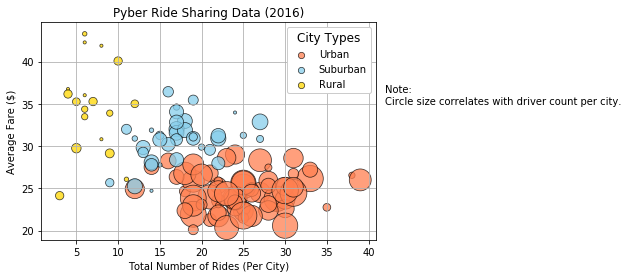

In [2]:
# BUBBLE PLOT OF RIDE SHARING DATA

# City Types and Chart Color arrays
city_types = ["Urban", "Suburban", "Rural"]
chart_colors = ["coral", "skyblue", "gold"]

# Obtain the x and y coordinates for each of the three city types & build the scatter plots for each city types
for i in range(len(city_types)):
    
    # df filtered and indexed by city type
    # each iteration & grouped by city name 
    city_group_df = combined_df.set_index("type").loc[city_types[i],:].groupby(["city"])

    # Total number of rides per city (x-axis)
    total_rides = city_group_df["city"].value_counts()

     # Average fare per city (y-axis)
    average_fare = city_group_df["fare"].mean()

    # Total number of drivers per city (bubble size)
    drivers_per_city =  city_group_df["driver_count"].mean()
    
    # Incorporate the other graph properties
    plt.scatter(total_rides, average_fare, s=(drivers_per_city*10), 
                facecolor=chart_colors[i], edgecolor="black",
                alpha = 0.75, linewidth = 0.75)
    
# Create a legend
pyber_legend = plt.legend(city_types, loc="best", framealpha=1)
pyber_legend.set_title("City Types",prop={"size":"large"})
                                   
# Incorporate a text label regarding circle size
for j in range(len(city_types)):
    pyber_legend.legendHandles[j]._sizes = [40]
plt.grid()
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")

# Save figure
plt.savefig("Pyber_bubbleplot.png", dpi=180, bbox_inches="tight")

In [3]:
# Show plot
plt.show()

In [4]:
# TOTAL FARES BY CITY TYPE

city_fares = [0,0,0]
explode = (0.1, 0, 0)

# Fares for each city type
for i in range(len(city_types)):
    type_fares_df = combined_df.set_index("type").loc[city_types[i],:]
    city_fares[i] = type_fares_df["fare"].sum().astype(int)

city_fares

[39854, 19356, 4327]

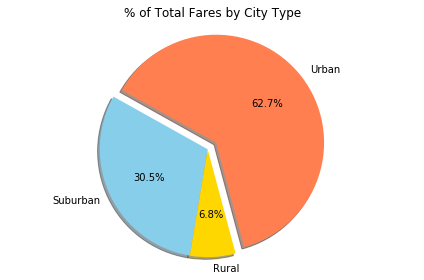

In [5]:
# Calculate Type Percents & Build Pie Chart
plt.pie(city_fares, explode=explode, labels=city_types, colors=chart_colors,
        autopct="%1.1f%%", shadow=True, startangle=285)
plt.axis("equal")
plt.title("% of Total Fares by City Type")
plt.tight_layout()

# Save Figure
plt.savefig("Pyber_Pie_Chart_Total_Fares_by_City_Type.png", dpi=180, bbox_inches="tight")

#Show Figure
plt.show()

In [6]:
# TOTAL RIDES BY CITY TYPE

city_rides = [0,0,0]
explode = (0.1, 0, 0)

# Sum rides for each of the city types
for i in range(len(city_types)):
    type_rides_df = combined_df.set_index("type").loc[city_types[i],:]
    city_rides[i] = type_rides_df["fare"].count()

city_rides

[1625, 625, 125]

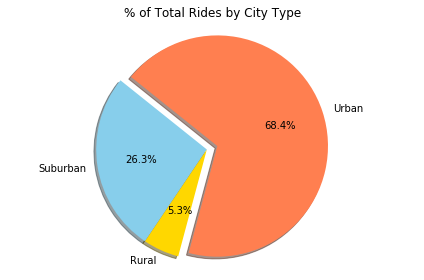

In [7]:
# Calculate Ride Percents & Build Pie Chart 
plt.pie(city_rides, explode=explode, labels=city_types, colors=chart_colors,
        autopct="%1.1f%%", shadow=True, startangle=255)
plt.axis("equal")
plt.title("% of Total Rides by City Type")
plt.tight_layout()

# Save Figure
plt.savefig("Pyber_Pie_Chart_Rides_by_City_Type.png", dpi=180, bbox_inches="tight")

# Show Figure
plt.show()

In [8]:
# TOTAL DRIVERS BY CITY TYPE

city_drivers = [0,0,0]
explode = (0.1, 0, 0)

# Drivers for each city type
for i in range(len(city_types)):
    driver_type_df = city_data_df.set_index("type").loc[city_types[i],:]
    city_drivers[i] = driver_type_df["driver_count"].sum()

city_drivers

[2405, 490, 78]

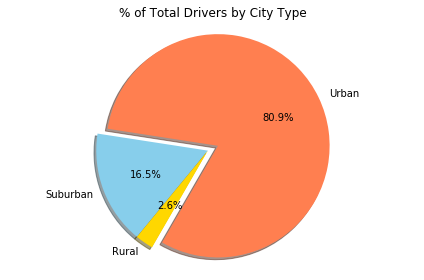

In [9]:
# Calculate Drivers Percents & Build Pie Chart     
plt.pie(city_drivers, explode=explode, labels=city_types, colors=chart_colors,
        autopct="%1.1f%%", shadow=True, startangle=240)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")
plt.tight_layout()

# Save Figure
plt.savefig("Pyber_Pie_Chart_Total_Drivers_by_City_Type.png", dpi=180, bbox_inches="tight")

# Show Figure
plt.show()